<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Pollution_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier

pd.set_option('display.max_columns', None)

DATA EXTRACTION

---

In [12]:
pollution = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/Classification/updated_pollution_dataset.csv")
pollution.info(), pollution.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


(None,
    Temperature  Humidity  PM2.5  PM10   NO2  SO2   CO  \
 0        29.80     59.10   5.20 17.90 18.90 9.20 1.72   
 1        28.30     75.60   2.30 12.20 30.80 9.70 1.64   
 
    Proximity_to_Industrial_Areas  Population_Density Air Quality  
 0                           6.30                 319    Moderate  
 1                           6.00                 611    Moderate  )

DATA PREPROCESSING

---

In [13]:
poll = pollution.copy()

In [14]:
enc = LabelEncoder()
obj = poll.select_dtypes(include='object').columns
for i in obj:
  poll[i] = enc.fit_transform(poll[i])
poll.head(2)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.80,59.10,5.20,17.90,18.90,9.20,1.72,6.30,319,2
1,28.30,75.60,2.30,12.20,30.80,9.70,1.64,6.00,611,2


DATA ANALYSIS

---

In [16]:
sns.set()

In [21]:
def plot_stype(data, column1, column2=None, plot_style='hist', style='whitegrid', **kwargs):
  sns.set_style(style)
  plt.figure(figsize=(15,5))
  if plot_style=='hist':
    sns.histplot(data=data, x=column1, kde=True, kde_kws=dict(cut=3), **kwargs)
  elif plot_style=='scatter':
    sns.scatterplot(data=data, x=column1, y=column2, **kwargs)
  elif plot_style=='box':
    sns.boxplot(data=data, x=column1, y=column2, **kwargs)
  else:
    raise ValueError(f"Unsupported Plot Type {plot_style}")
  plt.show()

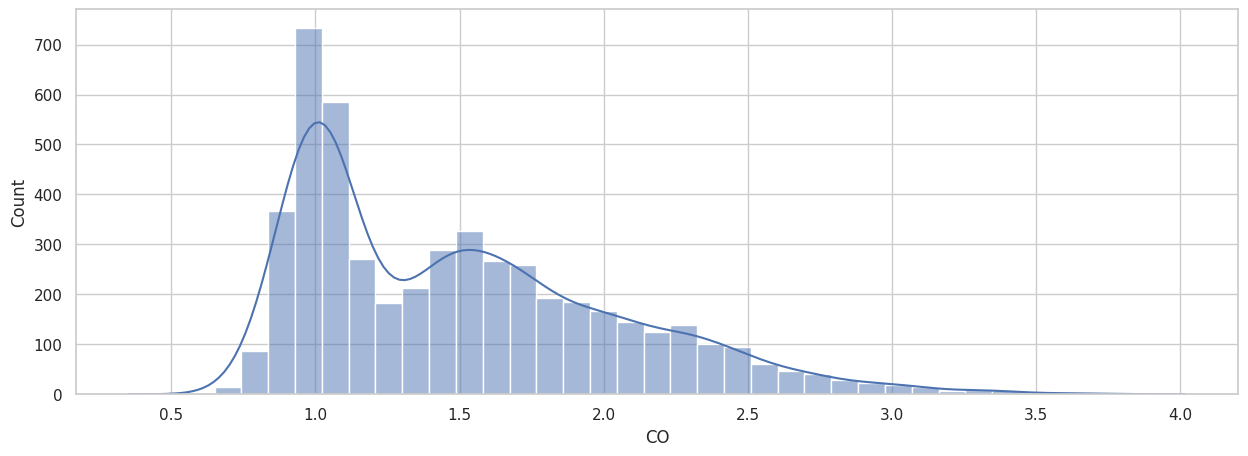

In [23]:
plot_stype(pollution, column1= 'CO', plot_style='hist', style='whitegrid')

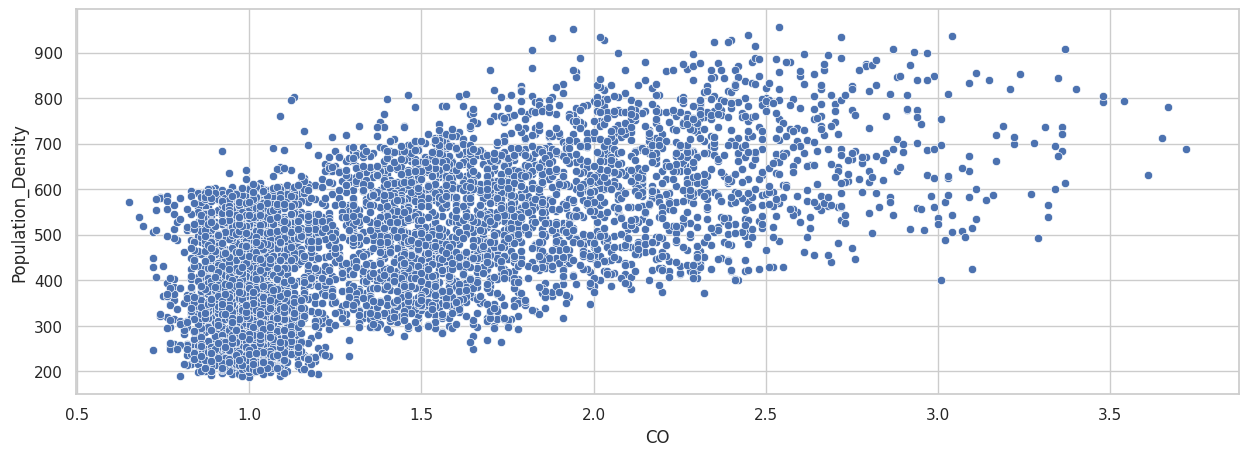

In [26]:
plot_stype(pollution, column1= 'CO', column2= 'Population_Density', plot_style='scatter', style='whitegrid')

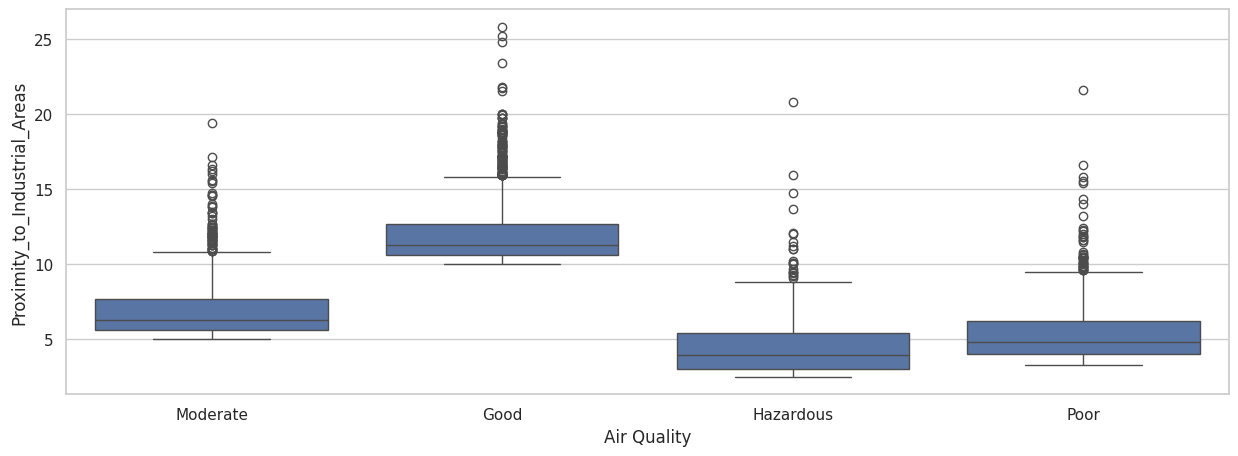

In [29]:
plot_stype(pollution, column1= 'Air Quality', column2= 'Proximity_to_Industrial_Areas', plot_style='box', style='whitegrid')

In [28]:
corr = poll.corr()
print(corr['Air Quality'].sort_values(ascending=False).round(3)*100)

Air Quality                     100.00
CO                               61.90
NO2                              52.20
Temperature                      50.10
SO2                              49.70
Population_Density               43.20
Humidity                         43.10
PM10                             36.60
PM2.5                            26.80
Proximity_to_Industrial_Areas   -71.60
Name: Air Quality, dtype: float64


MACHINE LEARNING MODEL BUILDING

---

In [35]:
X = poll.iloc[:,:-1]
y = poll.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

claf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
model, predictions = claf.fit(X_train, X_test, y_train, y_test)

 84%|████████▍ | 27/32 [00:07<00:01,  4.25it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
 97%|█████████▋| 31/32 [00:09<00:00,  2.37it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2191
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -0.921932
[LightGBM] [Info] Start training from score -2.330470
[LightGBM] [Info] Start training from score -1.198985
[LightGBM] [Info] Start training from score -1.592089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
100%|██████████| 32/32 [00:10<00:00,  3.03it/s]


In [37]:
model.head(5)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.96,0.94,None,0.96,1.31
ExtraTreesClassifier,0.96,0.94,None,0.96,1.10
LGBMClassifier,0.96,0.93,None,0.96,0.61
BaggingClassifier,0.94,0.92,None,0.94,0.52
QuadraticDiscriminantAnalysis,0.94,0.91,None,0.94,0.02


In [38]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

MODEL EVALUATION

---

In [40]:
test_pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, test_pred)
print(f"accuracy score for test is {acc_score}")

imp = clf.feature_importances_.round(3)*100
col = X.columns
f_i = pd.DataFrame({'Feature': col,
                    'Importance' : imp}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance")
print(f_i)

accuracy score for test is 0.96

Feature Importance
                         Feature  Importance
6                             CO       33.50
7  Proximity_to_Industrial_Areas       28.80
4                            NO2        9.90
5                            SO2        9.30
0                    Temperature        7.40
8             Population_Density        4.20
1                       Humidity        3.40
3                           PM10        2.30
2                          PM2.5        1.30
